In [2]:
import sys
import math
import random
import warnings
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
#Black Scholes formula
def bs_call(S, K, T, r, sigma):

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    
    return call

In [4]:
S      = 100       # stock price
K      = 100       # strike price
r      = 0.1       # risk free interest rate
tau    = 0.6       # time to maturity (green line)
tau2   = 0.003     # time to maturity (red line)
sigma  = 0.15      # volatility of first plot
sigma2 = 0.3       # volatility of second plot
lb     = 0         # lower limit of x axis 
ub     = 170       # upper limit of x axis

In [5]:
a = np.arange(lb, ub+1, 1)
call1   = bs_call(a, K, tau, r, sigma)
call1_2 = bs_call(a, K, tau2, r, sigma)
call2   = bs_call(a, K, tau, r, sigma2)
call2_2 = bs_call(a, K, tau2, r, sigma2)

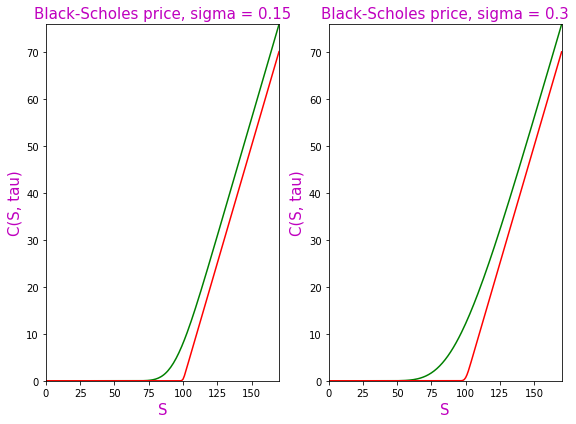

In [8]:
f = plt.figure(figsize=(8,6), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=f)
ax1 = f.add_subplot(spec2[0, 0])
ax2 = f.add_subplot(spec2[0, 1])

ax1.plot(a, call1, color="green")
ax1.plot(a, call1_2, color="red")
ax1.set_title('Black-Scholes price, sigma = 0.15', fontsize=15, color="m")
ax1.set_xlabel('S', fontsize=15, color="m")
ax1.set_ylabel('C(S, tau)', fontsize=15, color="m")
ax1.set_xlim(lb, ub)
ax1.set_ylim(0, np.max(call1))

ax2.plot(a, call2, color="green")
ax2.plot(a, call2_2, color="red")
ax2.set_title('Black-Scholes price, sigma = 0.3', fontsize=15, color="m")
ax2.set_xlabel('S', fontsize=15, color="m")
ax2.set_ylabel('C(S, tau)', fontsize=15, color="m")
ax2.set_xlim(lb, ub)
ax2.set_ylim(0, np.max(call2))

f.tight_layout()
plt.savefig('BS_Prices.png')
plt.show()